26.25102177553529

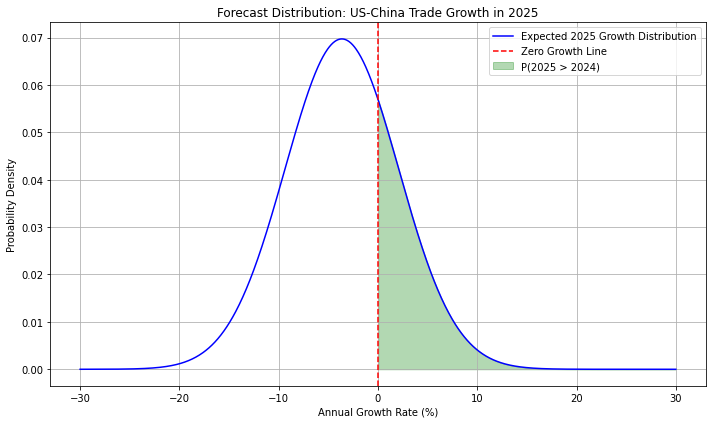

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Historical trade data (in billions USD).
data = {
    "Year": list(range(2010, 2025)),
    "Exports": [91.9111, 104.1215, 110.5166, 121.7462, 123.6572, 115.8734, 115.5948, 
                129.9972, 120.2812, 106.4812, 124.5815, 151.4394, 153.9874, 147.6355, 143.2267],
    "Imports": [364.9526, 399.3712, 425.6191, 440.4300, 468.4749, 483.2017, 462.4200, 
                505.1651, 538.5142, 449.1107, 432.5480, 504.2463, 536.2687, 427.2466, 438.7420]
}

df = pd.DataFrame(data)
df["Total_Trade"] = df["Exports"] + df["Imports"]

# Calculate YoY growth rates
df["Growth"] = df["Total_Trade"].pct_change() * 100

# Compute historical mean and standard deviation (excluding NaN).
mean_growth = df["Growth"].iloc[1:].mean()
std_growth = df["Growth"].iloc[1:].std()

# 2025 data.
jan_may_2024 = 224.0  # Jan-May 2024 (approximate).
jan_may_2025 = 195.1  # Jan-May 2025
w1 = jan_may_2024 / 581.97  # ~0.3845
w2 = 1 - w1

# Weighted model for 2025 total growth.
known_growth = (jan_may_2025 - jan_may_2024) / jan_may_2024 * 100
expected_annual_growth = w1 * known_growth + w2 * mean_growth
expected_sd = w2 * std_growth

# Probability that 2025 > 2024.
z_score = (0 - expected_annual_growth) / expected_sd
probability = 1 - norm.cdf(z_score)

# Plot growth distribution.
x = np.linspace(-30, 30, 1000)
pdf = norm.pdf(x, expected_annual_growth, expected_sd)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label="Expected 2025 Growth Distribution", color='blue')
plt.axvline(0, color='red', linestyle='--', label='Zero Growth Line')
plt.fill_between(x, pdf, where=(x > 0), color='green', alpha=0.3, label='P(2025 > 2024)')
plt.title("Forecast Distribution: US-China Trade Growth in 2025")
plt.xlabel("Annual Growth Rate (%)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.tight_layout()


probability * 100 